In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller, kpss
import seaborn as sns
import os

import plotly.express as px
import plotly.graph_objects as go

In [5]:
aqi = pd.read_csv('city_day.csv', index_col='Date', parse_dates = True)
aqi.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
delhi_aqi_data = aqi.groupby('City').get_group('Delhi')

In [7]:
delhi_aqi_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
2015-01-02,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2015-01-03,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
2015-01-04,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
2015-01-05,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [8]:
delhi_aqi_data.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2020-06-27,Delhi,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
2020-06-28,Delhi,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
2020-06-29,Delhi,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
2020-06-30,Delhi,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate
2020-07-01,Delhi,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0,Moderate


In [9]:
delhi_aqi_data.isnull().sum()

City            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [10]:
delhi_aqi_data.interpolate(limit_direction="both",inplace=True)

In [11]:
delhi_aqi_data.isnull().sum()

City           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket    10
dtype: int64

In [12]:
for i,each in enumerate(delhi_aqi_data['AQI_Bucket']):
    if pd.isnull(delhi_aqi_data['AQI_Bucket'].iloc[i]):
        if delhi_aqi_data['AQI'].iloc[i]>=0.0 and delhi_aqi_data['AQI'].iloc[i]<=50.0:
            delhi_aqi_data['AQI_Bucket'].iloc[i] = 'Good'
        elif delhi_aqi_data['AQI'].iloc[i]>=51.0 and delhi_aqi_data['AQI'].iloc[i]<=100.0:
            delhi_aqi_data['AQI_Bucket'].iloc[i] = 'Satisfactory'
        elif delhi_aqi_data['AQI'].iloc[i]>=101.0 and delhi_aqi_data['AQI'].iloc[i]<=200.0:
            delhi_aqi_data['AQI_Bucket'].iloc[i] = 'Moderate'
        elif delhi_aqi_data['AQI'].iloc[i]>=201.0 and delhi_aqi_data['AQI'].iloc[i]<=300.0:
            delhi_aqi_data['AQI_Bucket'].iloc[i] = 'Poor'
        elif delhi_aqi_data['AQI'].iloc[i]>=301.0 and delhi_aqi_data['AQI'].iloc[i]<=400.0:
            delhi_aqi_data['AQI_Bucket'].iloc[i] = 'Very Poor'
        else:
            delhi_aqi_data['AQI_Bucket'].iloc[i] = 'Severe'   

Text(0, 0.5, 'PM2.5')

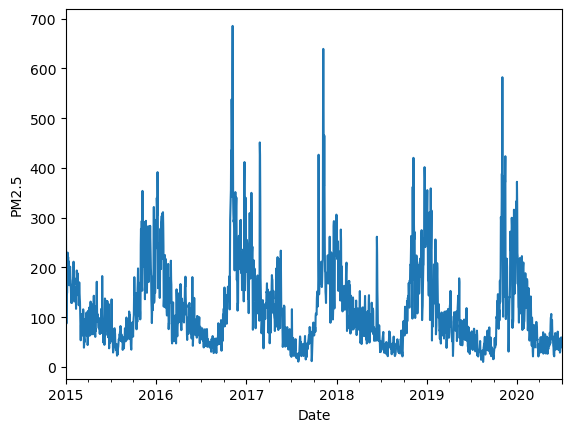

In [13]:
delhi_aqi_data['PM2.5'].plot()
plt.ylabel('PM2.5')

Text(0, 0.5, 'AQI')

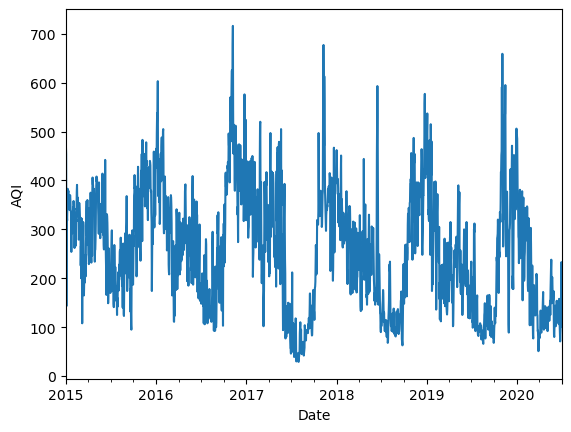

In [14]:
delhi_aqi_data['AQI'].plot()
plt.ylabel('AQI')

In [15]:
adf_result = adfuller(delhi_aqi_data['AQI'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -3.4319343472539736
p-value: 0.009917226121156622
Critical Values:
	1%: -3.4336386745240652
	5%: -2.8629927557359443
	10%: -2.5675433856598793


In [16]:
kpss_result = kpss(delhi_aqi_data['AQI'])
print('\nKPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print(f'\t{key}: {value}')


KPSS Statistic: 0.8356074190220247
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [17]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [18]:
stepwise_fit = auto_arima(delhi_aqi_data['AQI'], trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21398.632, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21630.884, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21631.914, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21631.126, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21628.909, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21396.642, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21478.335, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21452.850, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=21398.631, Time=0.87 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=21416.301, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21401.219, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=21394.772, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=21476.379, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2009
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -10693.386
Date:                Thu, 07 Mar 2024   AIC                          21394.772
Time:                        21:34:26   BIC                          21417.191
Sample:                    01-01-2015   HQIC                         21403.002
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4912      0.036     13.561      0.000       0.420       0.562
ma.L1         -0.6051      0.037    -16.190      0.000      -0.678      -0.532
ma.L2         -0.2396      0.023    -10.493      0.000      -0.284      -0.195
sigma2      2471.6508     53.484     46.213      0.000    2366.824    2576.478
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               480.34
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.05
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
p = 1
d = 1
q = 2

model = ARIMA(delhi_aqi_data['AQI'], order=(p, d, q))  
arima_model = model.fit()

In [27]:
forecast = arima_model.forecast(steps=365)  
print(forecast)

2020-07-02    113.909668
2020-07-03    119.488486
2020-07-04    122.228707
2020-07-05    123.574658
2020-07-06    124.235766
                 ...    
2021-06-27    124.873962
2021-06-28    124.873962
2021-06-29    124.873962
2021-06-30    124.873962
2021-07-01    124.873962
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


<Axes: >

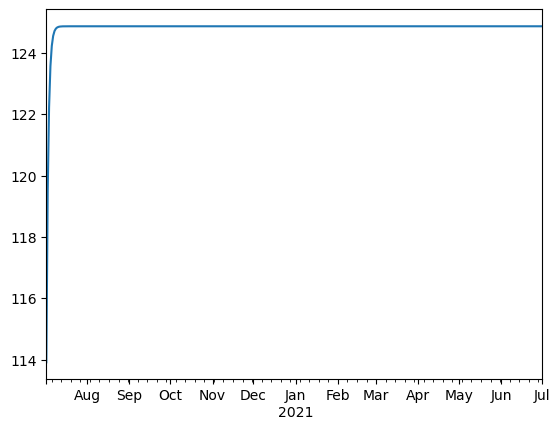

In [28]:
forecast.plot()

<Axes: xlabel='Date'>

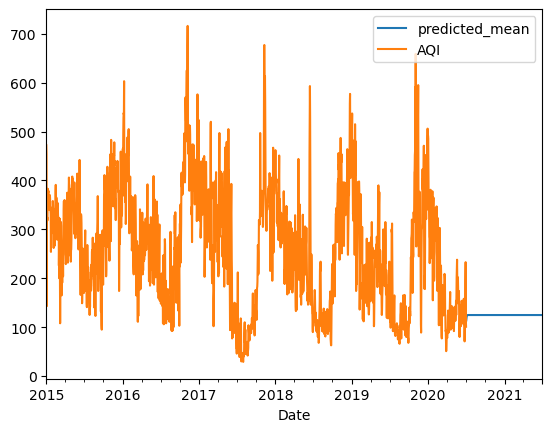

In [29]:
forecast.plot(legend=True)
delhi_aqi_data['AQI'].plot(legend=True)

In [30]:
delhi_aqi_data['AQI'].mean()

258.62145345943253